In [1]:
import random
import numpy as np
import pandas as pd

In [23]:
class citizen:
    def __init__(self, id=0, money=100):
        self.id=id
        self.money=money
        
    def consume(self, products):
        best_qv=0
        best_price=100000
        for pr in products:
            if pr.quality>best_qv:
                best_qv=pr.quality
            if pr.price<best_price:
                best_price=pr.price
                
        pr_to_choose=product(id=-1)
        doshik=product(id=-1)
        maybah=product(id=-1)
        
        print(best_qv)
        print(best_price)
        for pr in products:
            if (pr.price==best_price):
                doshik=pr
            if (pr.quality==best_qv):
                maybah=pr
                
        if self.money>=pr_to_choose.price:
            return pr_to_choose.id
        else:
            return -1
                
        
        
class product:
    def __init__(self, id=0, quality=10, price=10):
        self.id=id
        self.quality=quality
        self.price=price

In [24]:
N=200
max_salary=100
min_salary=1

In [25]:
cit_lst=[]
tst=[]
for i in range(N):
    cit=citizen(id=i, money=random.randint(min_salary, max_salary))
    cit_lst.append(cit)
    tst.append(cit_lst[i].money)

In [26]:
df=pd.DataFrame(tst)
g=df.groupby(0).sum()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b8dda09e8>]],
      dtype=object)

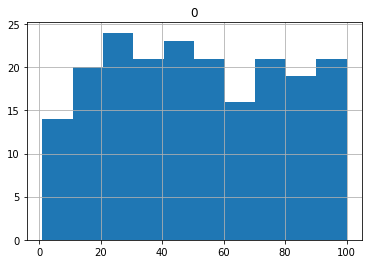

In [27]:
df.hist()

In [28]:
a=product(id=0, quality=10, price=10)
b=product(id=1, quality=100, price=100)
c=product(id=2, quality=50, price=50)

In [29]:
cit_lst[i].consume([a,b,c])

100
10


-1

In [30]:
for i in range(N):
    print('My money: ', cit_lst[i].money)
    print('My choise: ', cit_lst[i].consume([a,b,c]))

My money:  30
100
10
My choise:  -1
My money:  52
100
10
My choise:  -1
My money:  28
100
10
My choise:  -1
My money:  50
100
10
My choise:  -1
My money:  22
100
10
My choise:  -1
My money:  19
100
10
My choise:  -1
My money:  14
100
10
My choise:  -1
My money:  23
100
10
My choise:  -1
My money:  49
100
10
My choise:  -1
My money:  68
100
10
My choise:  -1
My money:  48
100
10
My choise:  -1
My money:  57
100
10
My choise:  -1
My money:  30
100
10
My choise:  -1
My money:  86
100
10
My choise:  -1
My money:  24
100
10
My choise:  -1
My money:  33
100
10
My choise:  -1
My money:  36
100
10
My choise:  -1
My money:  22
100
10
My choise:  -1
My money:  34
100
10
My choise:  -1
My money:  28
100
10
My choise:  -1
My money:  64
100
10
My choise:  -1
My money:  13
100
10
My choise:  -1
My money:  65
100
10
My choise:  -1
My money:  55
100
10
My choise:  -1
My money:  68
100
10
My choise:  -1
My money:  4
100
10
My choise:  -1
My money:  13
100
10
My choise:  -1
My money:  46
100
10
My chois